In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_read = pd.read_csv('AuAuGrad_residue',index_col=0)
    df_read.head()

Loading data from file


In [3]:
df_read

,residue,name,obs,tl_training_n
0,-1.127325,TL,dN_dy_pion[0 5],47
1,-0.376399,TL,dN_dy_pion[0 5],47
2,-0.181106,TL,dN_dy_pion[0 5],47
3,0.196592,TL,dN_dy_pion[0 5],47
4,-1.901427,TL,dN_dy_pion[0 5],47
...,...,...,...,...
11155,0.272326,GP,v22[40 50],473
11156,-0.656258,GP,v22[40 50],473
11157,0.457680,GP,v22[40 50],473
11158,0.619293,GP,v22[40 50],473


In [4]:
#sns.set_context("notebook")

In [5]:
# sns.set_context("poster")
# df_read.rename(columns={'tl_training_n':'Target data','residue':'normalized residue'}, inplace=True)
# plot2= sns.displot(df_read, kind="kde", x="normalized residue", col='Target data', row="obs", hue="name",
#                   common_norm=False, facet_kws=dict(margin_titles=True,sharex=False))
# #plot2.set(xlabel='normalized residue')
# #axes = plot2.axes.flatten()
# #for ax in axes:
# #    ax.set_title("Training points from target")

# #plot2.set_xticklabels(plot2.get_xticklabels(), rotation=45, horizontalalignment='right')





In [6]:
# axes = plot2.fig.axes
# from scipy import stats                                                         
# xx = np.arange(-4, +4, 0.001)                                                   
# yy = stats.norm.pdf(xx)                                                         


In [7]:
# for i, ax in enumerate(axes):
#     sns.lineplot(ax=ax,x=xx, y=yy, label="Standard Normal dist", legend=False, color='red')
# plot2.savefig("AuAuGrad_norm_residue.png", dpi=100)
# plot2.fig
# #plt.legend(loc='upper left', labels=['TL', 'GP','Normal'])

In [8]:
if 'df_results' in globals():
    print('Pandas Dataframe exists\nDo not load from file')
else:
    print('Loading data from file')
    df_res = pd.read_csv("AuAuGrad",index_col=0)
df_res.head()

Loading data from file


,observable,fold,n_training,r2_lin_tl,r2_stand_GP,mse_lin_tl,mse_stand_GP,wn_lin_tl,wn_stand_GP,rho,mse_lin_mf,r2_lin_mf,wn_lin_mf_0,wn_lin_mf_1
0,dN_dy_pion[0 5],0,47,NaN,0.781898,NaN,0.056306,NaN,0.001796,1.109381,0.019519,0.924393,0.007269,4.368581e-10
1,dN_dy_pion[0 5],0,94,NaN,0.931398,NaN,0.017711,NaN,0.001344,0.897814,0.013431,0.947976,0.007269,2.755636e-04
2,dN_dy_pion[0 5],0,141,NaN,0.953371,NaN,0.012038,NaN,0.003087,0.784739,0.008346,0.967671,0.007269,4.513433e-29
3,dN_dy_pion[0 5],0,188,NaN,0.956902,NaN,0.011126,NaN,0.003264,0.766279,0.008617,0.966624,0.007269,2.143126e-188
4,dN_dy_pion[0 5],0,235,NaN,0.959546,NaN,0.010444,NaN,0.003749,0.615187,0.007525,0.970853,0.007269,7.282431e-04


In [9]:
df_gp_mse = df_res[['observable','fold','n_training','r2_stand_GP','mse_stand_GP']]
df_gp_mse['name'] = 'GP'
df_gp_mse.rename(columns={'r2_stand_GP':'R2','mse_stand_GP':'MSE'}, inplace=True)
df_gp_mse.head()

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,observable,fold,n_training,R2,MSE,name
0,dN_dy_pion[0 5],0,47,0.781898,0.056306,GP
1,dN_dy_pion[0 5],0,94,0.931398,0.017711,GP
2,dN_dy_pion[0 5],0,141,0.953371,0.012038,GP
3,dN_dy_pion[0 5],0,188,0.956902,0.011126,GP
4,dN_dy_pion[0 5],0,235,0.959546,0.010444,GP


In [10]:
df_tl_mse = df_res[['observable','fold','n_training','r2_lin_mf','mse_lin_mf']]
df_tl_mse['name'] = 'TL'
df_tl_mse.rename(columns={'r2_lin_mf':'R2','mse_lin_mf':'MSE'}, inplace=True)
df_tl_mse.head()

df_all = pd.concat([df_tl_mse,df_gp_mse],axis=0)

/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/pandas/core/frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df_all.head()

,observable,fold,n_training,R2,MSE,name
0,dN_dy_pion[0 5],0,47,0.924393,0.019519,TL
1,dN_dy_pion[0 5],0,94,0.947976,0.013431,TL
2,dN_dy_pion[0 5],0,141,0.967671,0.008346,TL
3,dN_dy_pion[0 5],0,188,0.966624,0.008617,TL
4,dN_dy_pion[0 5],0,235,0.970853,0.007525,TL


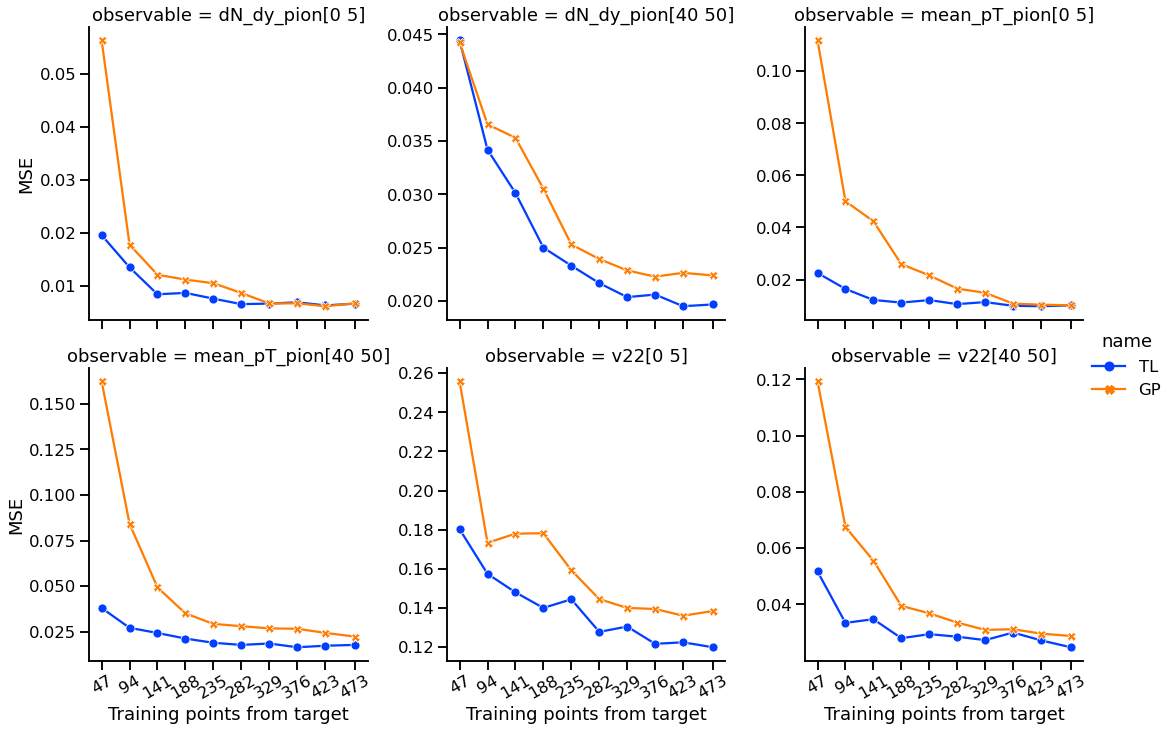

In [12]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",col="observable", kind='line', col_wrap=3,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
g.set_xticklabels(np.unique(df_all['n_training']),rotation=30)
g.savefig("AuAuGrad_all_observables_MSE.png", dpi=100)
#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

In [13]:
cond1 = df_all['name']=='GP'
cond2 = df_all['n_training']==473
red_line = np.mean(df_all.loc[cond1 & cond2]['MSE'])

In [14]:
red_line

0.038104093264517476

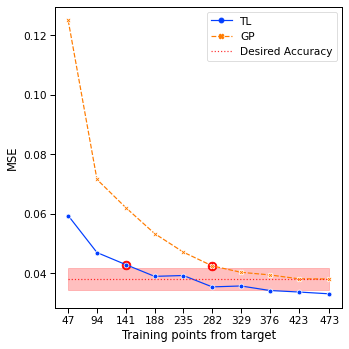

In [15]:
sns.set_context('paper', font_scale=1.2)
line,ax = plt.subplots(figsize=(5,5))
ax = sns.lineplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=True,ci=None)
#ax.set_yscale('log')
#ax.set_ylim(0,1)

for i in [141,282]:

    cond3 = df_all['n_training']==i
    cond4 = df_all['name']=='TL'

    tl_data = np.mean(df_all.loc[cond3 & cond4]['MSE'])
    gp_data = np.mean(df_all.loc[cond1 & cond3]['MSE'])
    if i==141:
        ax.scatter(i,tl_data,c='red',s=300, marker='.')
    if i== 282:
        ax.scatter(i,gp_data,c='red',s=300, marker='.')
#ax.set_title('Averaged MSE')
#a,b = ax.get_xbound()
ax.plot(np.unique(df_all['n_training']),red_line*np.repeat(1,10), 
        color='red', alpha=0.8, label='Desired Accuracy',
       linestyle='dotted')
ax.fill_between(x=np.unique(df_all['n_training']),y1=red_line-red_line*0.10,y2=red_line+red_line*0.10,
               color='red',alpha=0.25)

ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')

#ax.axhline(0.05,color='red', alpha=0.5, label='Desired Accuracy')
ax.legend()
plt.tight_layout()
plt.savefig("AuAuGrad_averaged_MSE_paper.png", dpi=100, bbox_inches='tight')


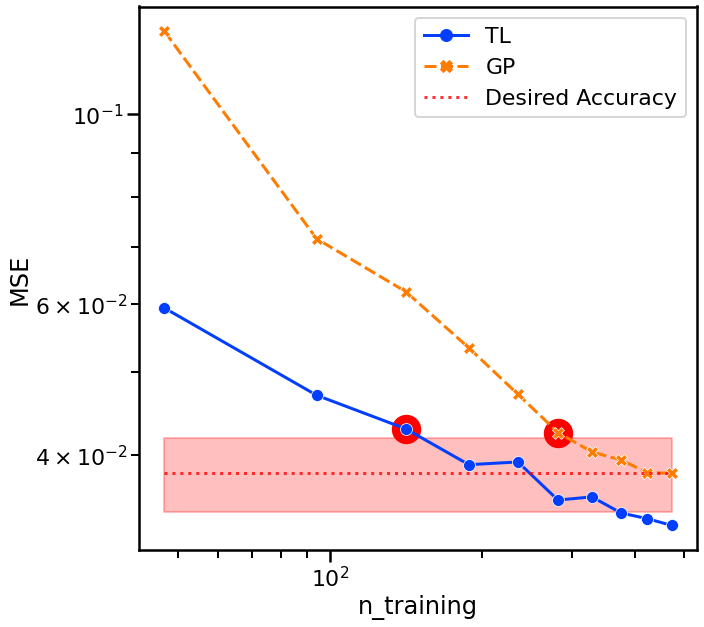

In [17]:
sns.set_context('poster')
line,ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=df_all.drop('R2', axis=1), x="n_training", y="MSE",palette='bright',
                hue='name', style="name",
               markers=True, dashes=True,ci=None)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_ylim(0,1)

for i in [141,282]:

    cond3 = df_all['n_training']==i
    cond4 = df_all['name']=='TL'

    tl_data = np.mean(df_all.loc[cond3 & cond4]['MSE'])
    gp_data = np.mean(df_all.loc[cond1 & cond3]['MSE'])
    if i==141:
        ax.scatter(i,tl_data,c='red',s=3000, marker='.')
    if i== 282:
        ax.scatter(i,gp_data,c='red',s=3000, marker='.')
#ax.set_title('Averaged MSE')
#a,b = ax.get_xbound()
ax.plot(np.unique(df_all['n_training']),red_line*np.repeat(1,10), 
        color='red', alpha=0.8, label='Desired Accuracy',
       linestyle='dotted')
ax.fill_between(x=np.unique(df_all['n_training']),y1=red_line-red_line*0.10,y2=red_line+red_line*0.10,
               color='red',alpha=0.25)

#ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')

#ax.axhline(0.05,color='red', alpha=0.5, label='Desired Accuracy')
ax.legend()
plt.savefig("AuAuGrad_averaged_MSE.png", dpi=100)



<IPython.core.display.Javascript object>


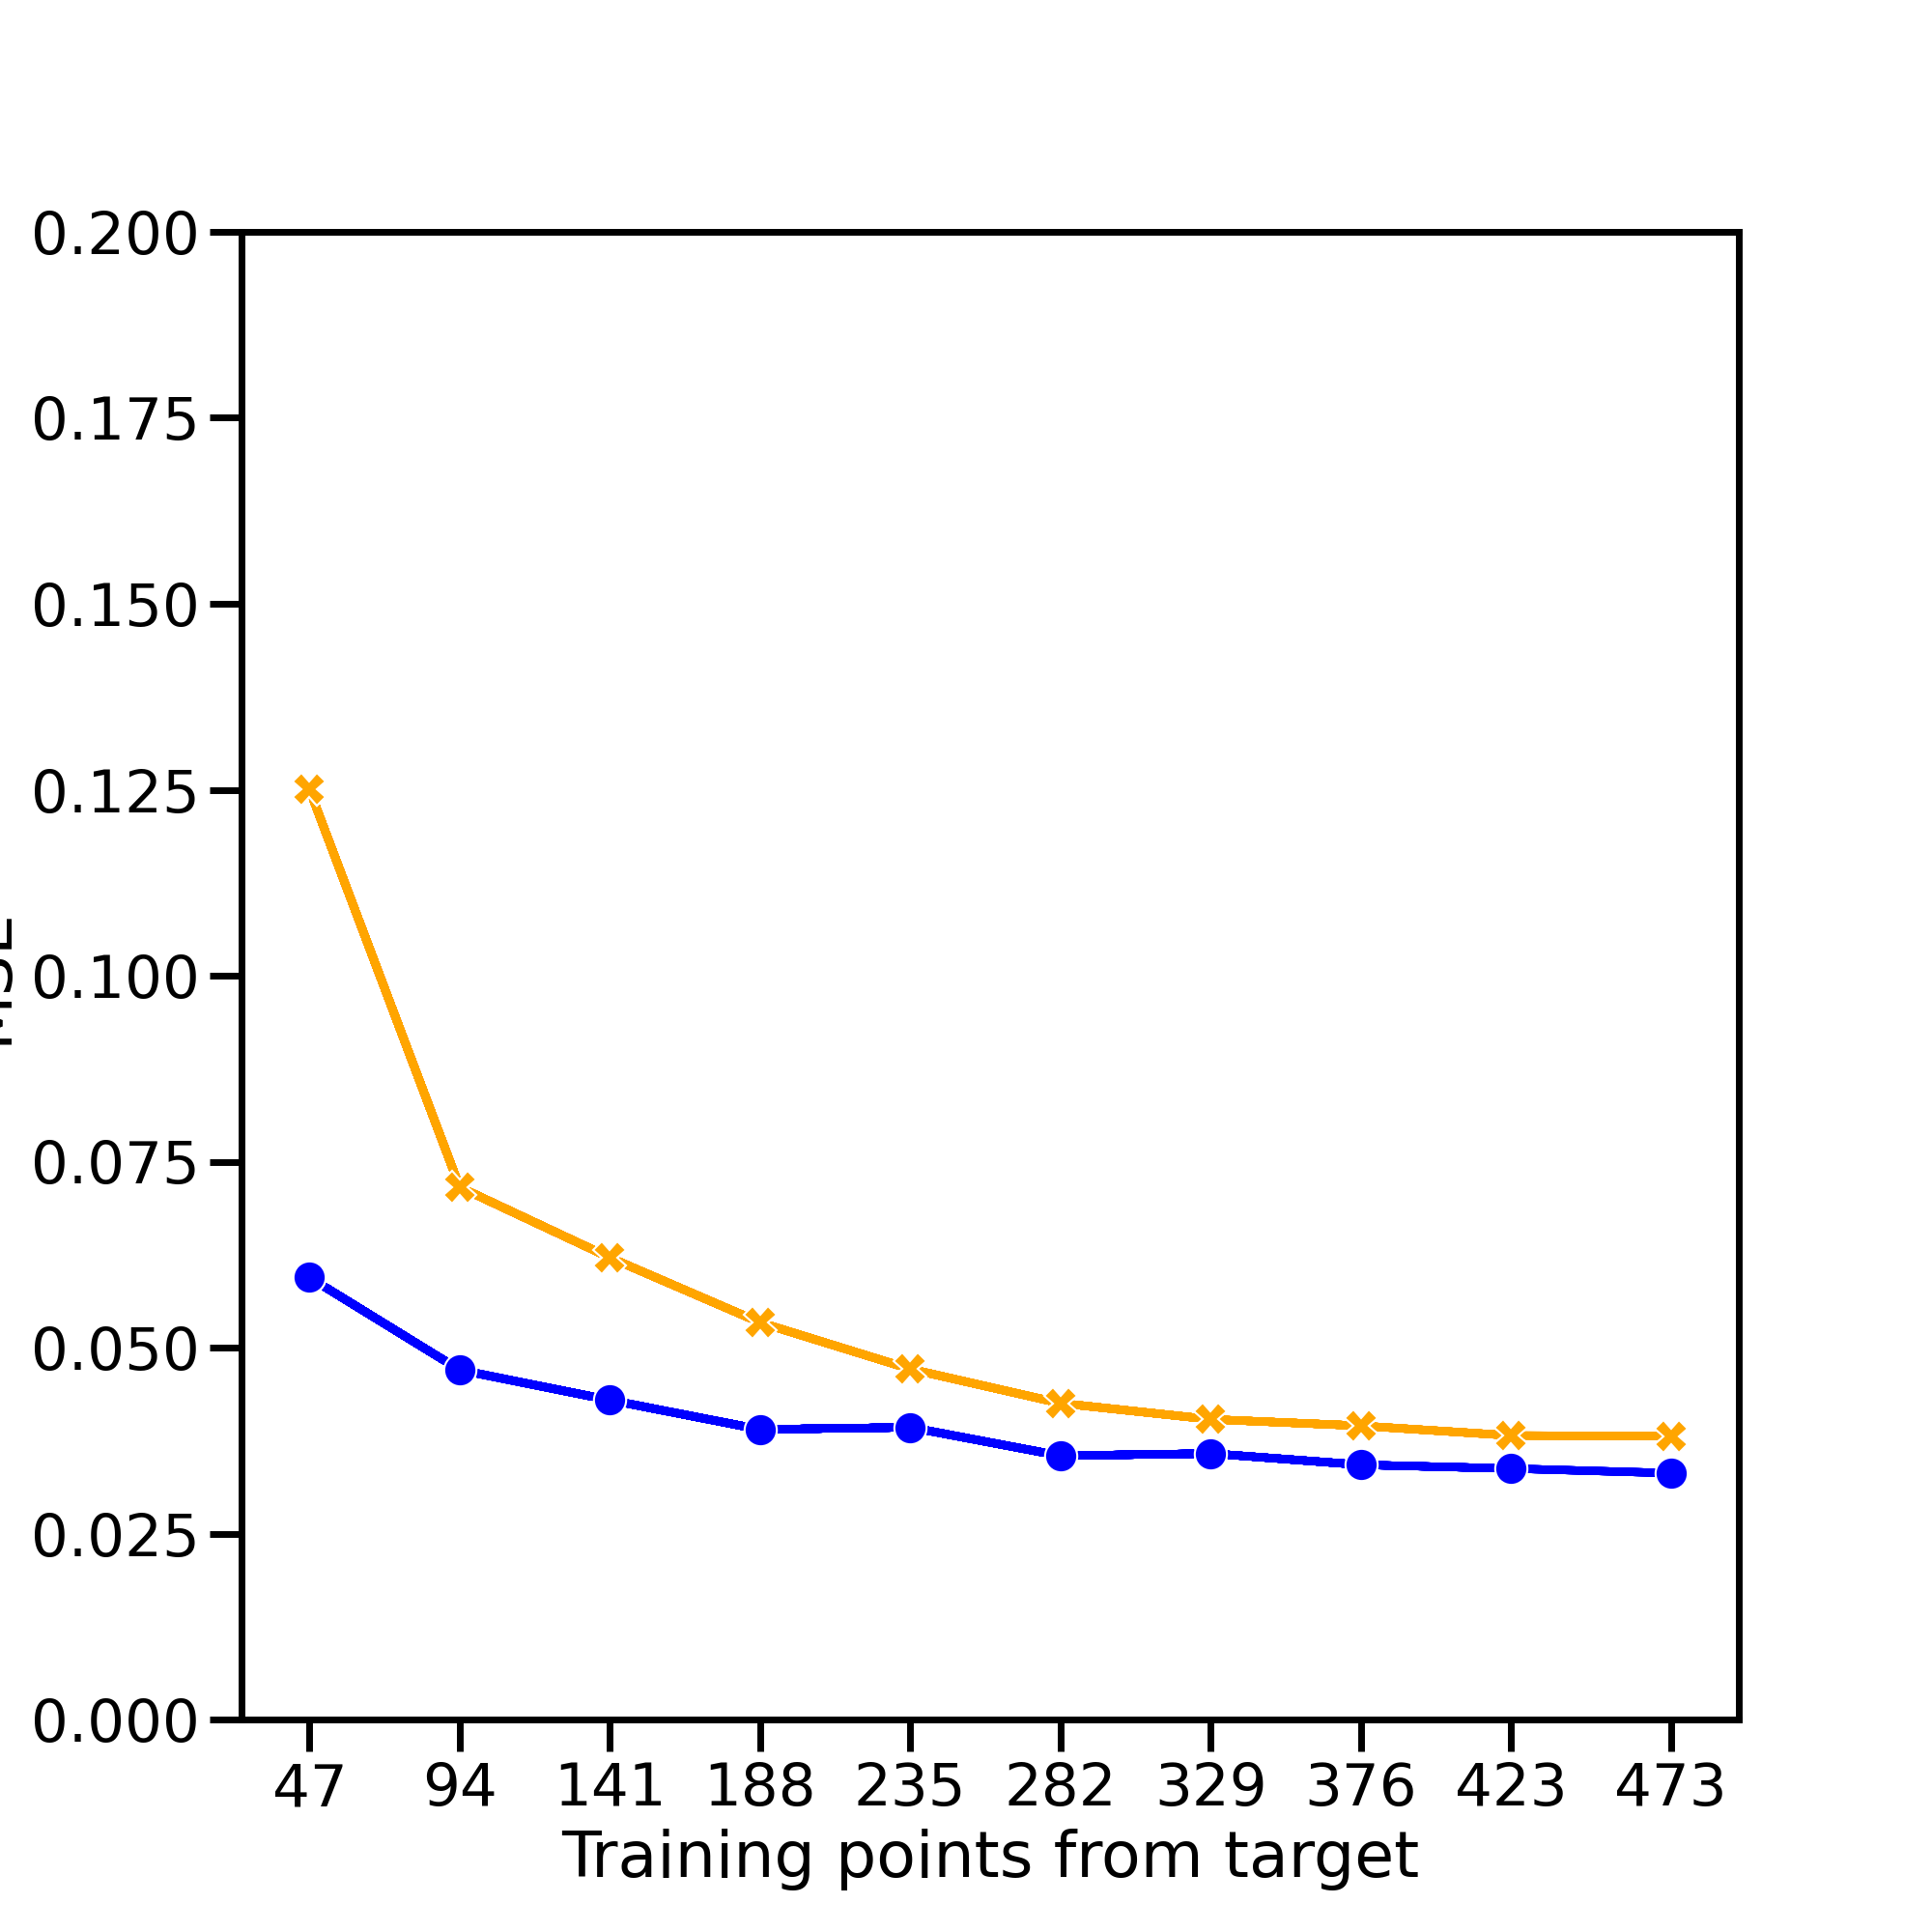

In [17]:
%matplotlib notebook
import matplotlib
sns.set_context('poster')

# color palette as dictionary
palette = {"TL":"blue",
           "GP":"orange"}

fig,ax1 = plt.subplots(figsize=(10,10))
ax1.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
ax1.set_ylim(0,0.2)

def more_events(i):
    new_df = df_all[df_all['n_training']<=i]
    cond1 = df_all['name']=='GP'
    cond2 = df_all['n_training']==485
    cond3 = df_all['n_training']==i
    cond4 = df_all['name']=='TL'
    red_line = np.mean(df_all.loc[cond1 & cond2]['MSE'])
    tl_data = np.mean(df_all.loc[cond3 & cond4]['MSE'])
    gp_data = np.mean(df_all.loc[cond1 & cond3]['MSE'])
    
    #new_df.head()
    ax1.axhline(red_line,color='red', alpha=0.5)
    if i==48:
        g1 = sns.lineplot(data=new_df.drop('R2', axis=1), x="n_training", y="MSE",palette=palette,
                      hue='name', style="name",
                      markers=True, dashes=False, ci=None,legend=False,ax=ax1)
        plt.tight_layout()
    else:
        g2 = sns.lineplot(data=new_df.drop('R2', axis=1), x="n_training", y="MSE",palette=palette,
                       hue='name', style="name",
                      markers=True, dashes=False, legend=False, ci=None,ax=ax1)
    if i==144:
        ax1.scatter(i,tl_data,c='red',s=3000, marker='.')
    if i== 336:
        ax1.scatter(i,gp_data,c='red',s=3000, marker='.')
    
      

#plt.savefig("AuAuGrad_averaged_MSE.png", dpi=100)
import matplotlib.animation as anim
animator = anim.FuncAnimation(fig, more_events, interval = 10, frames=np.unique(df_all['n_training']))
plt.show()

f = "AuAuanimation_mse.gif" 
writergif = matplotlib.animation.PillowWriter(fps=2) 
animator.save(f, writer=writergif)

<IPython.core.display.Javascript object>


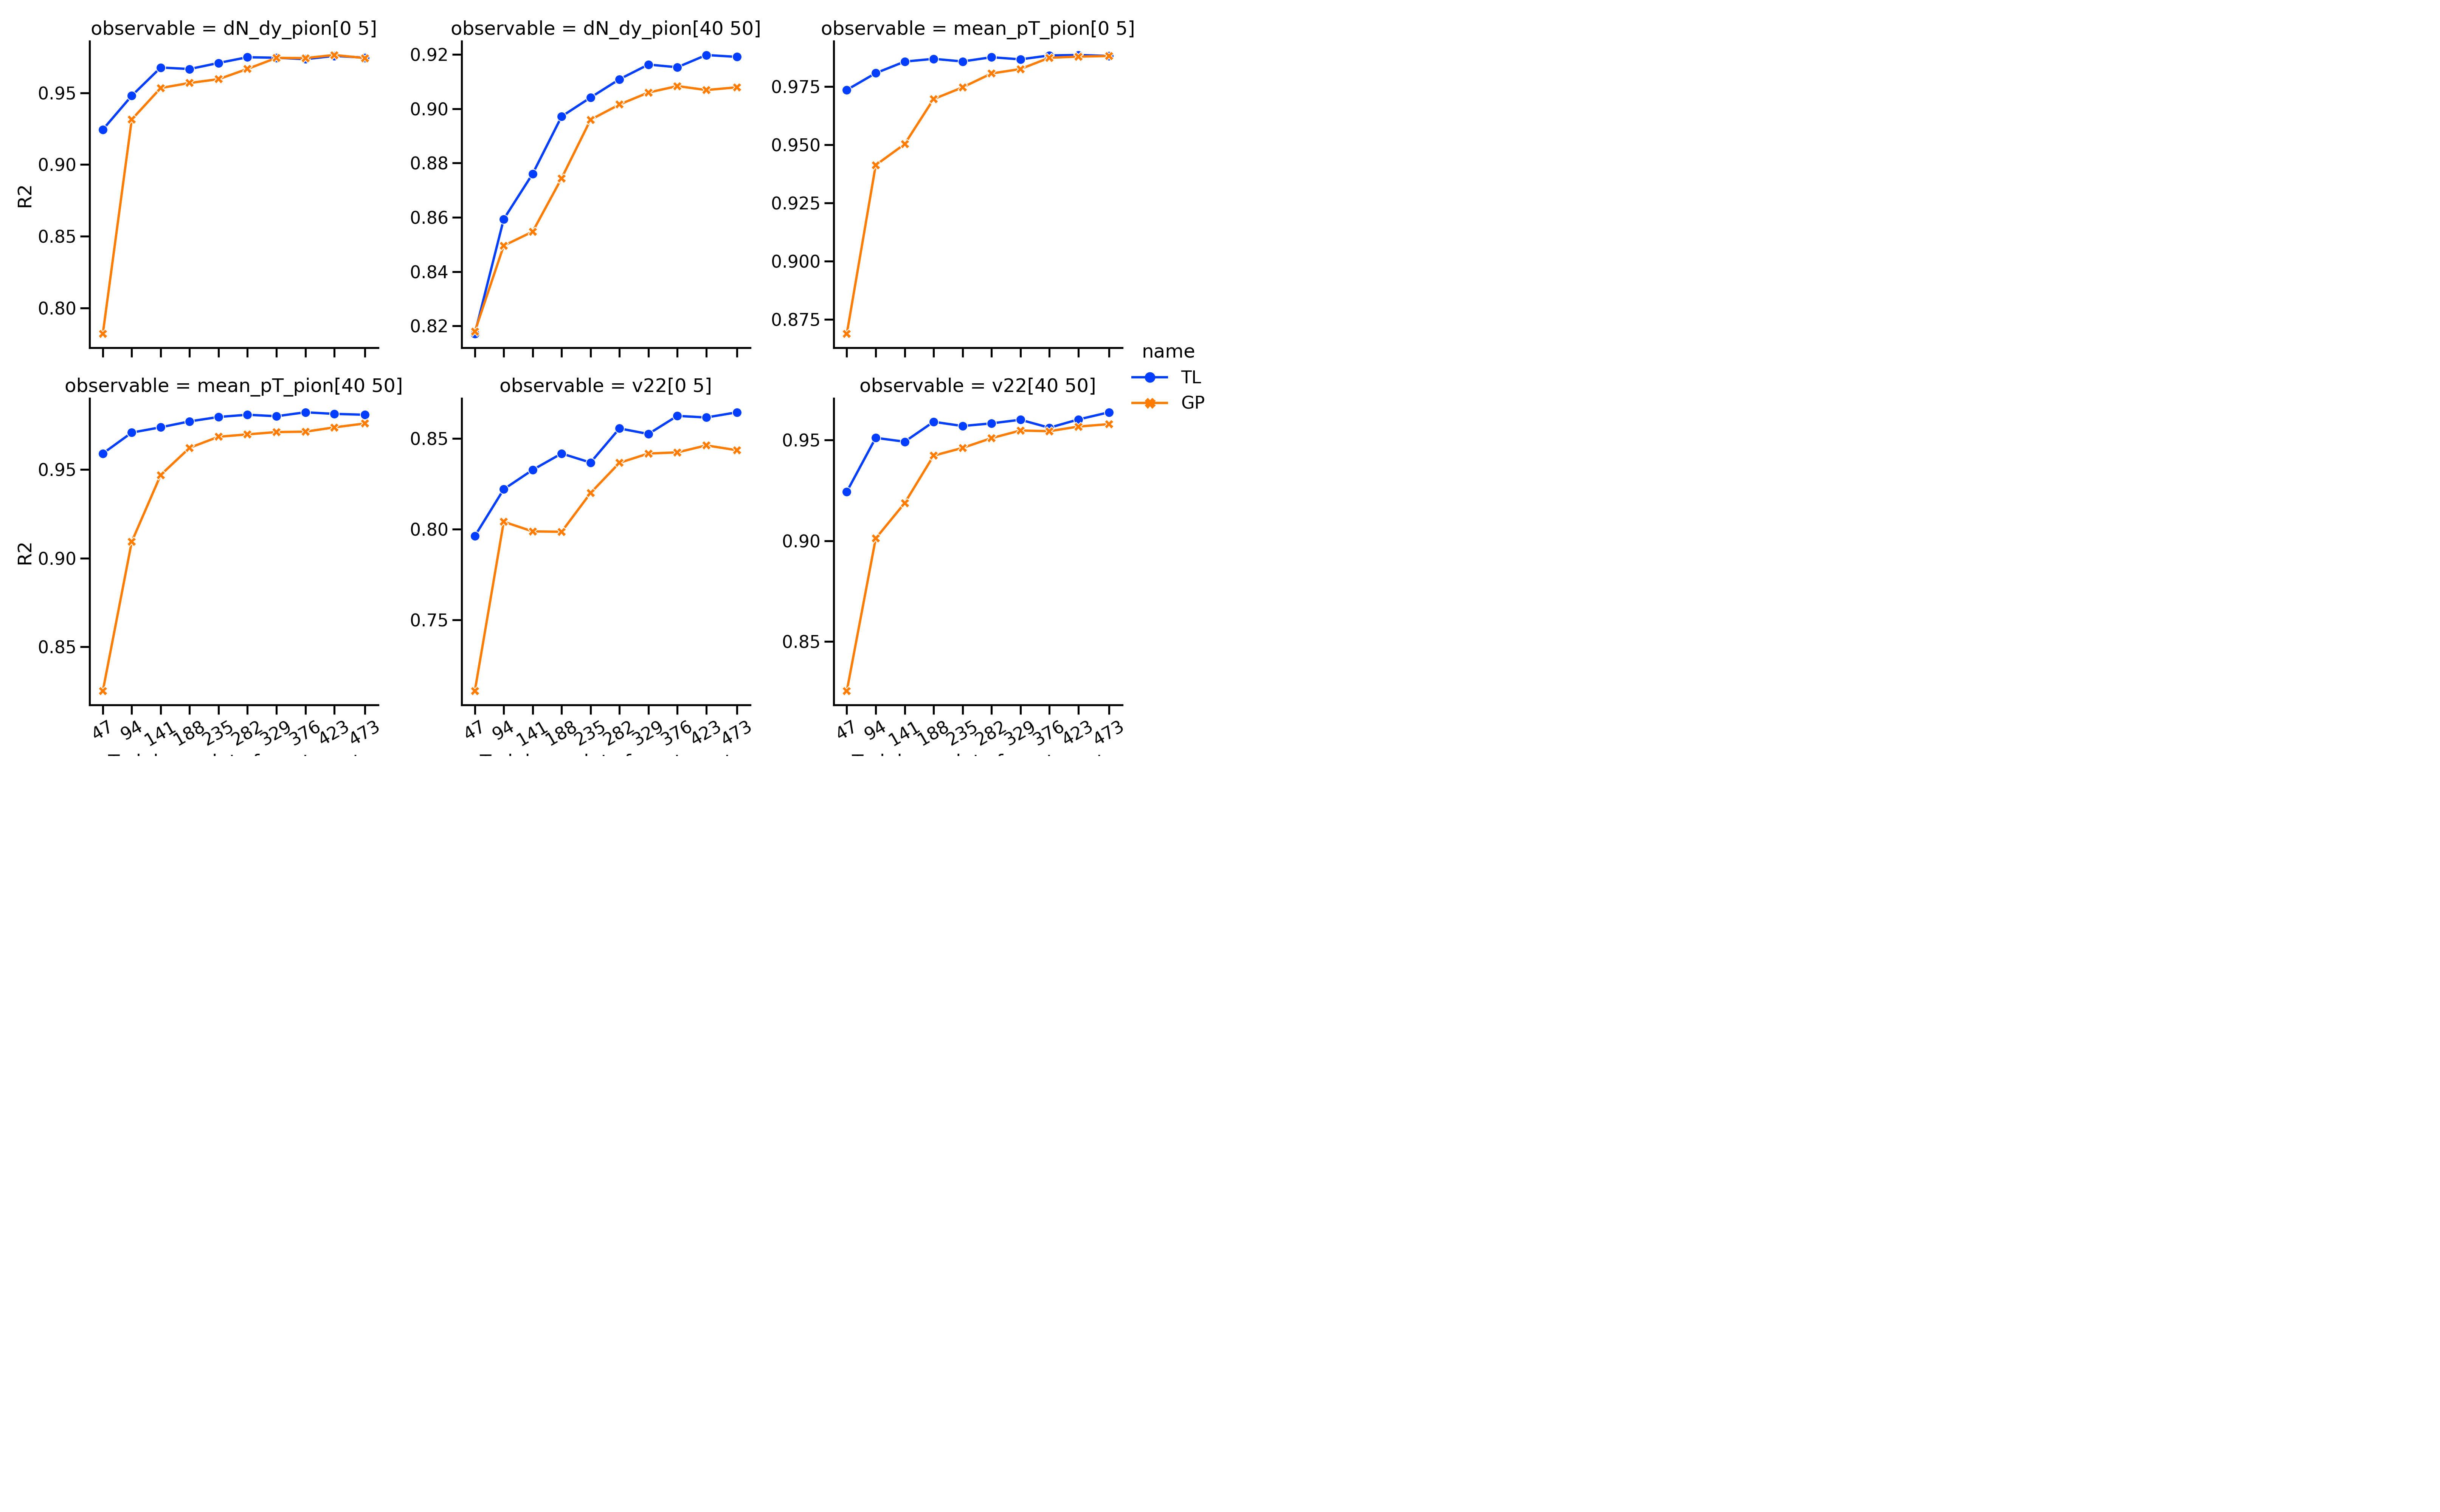

In [16]:
sns.set_context('talk')

g = sns.relplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue="name",style='name', col="observable", kind='line', col_wrap=3,
               markers=True, dashes=False, facet_kws={'sharey': False, 'sharex': True})
g.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
g.set_xticklabels(np.unique(df_all['n_training']),rotation=30)
g.savefig("AuAuGrad_all_observables_R2.png", dpi=100)

#g.map(sns.lineplot, "n_training", "mse", "name", legend='auto',markers=True, dashes=False)

<IPython.core.display.Javascript object>


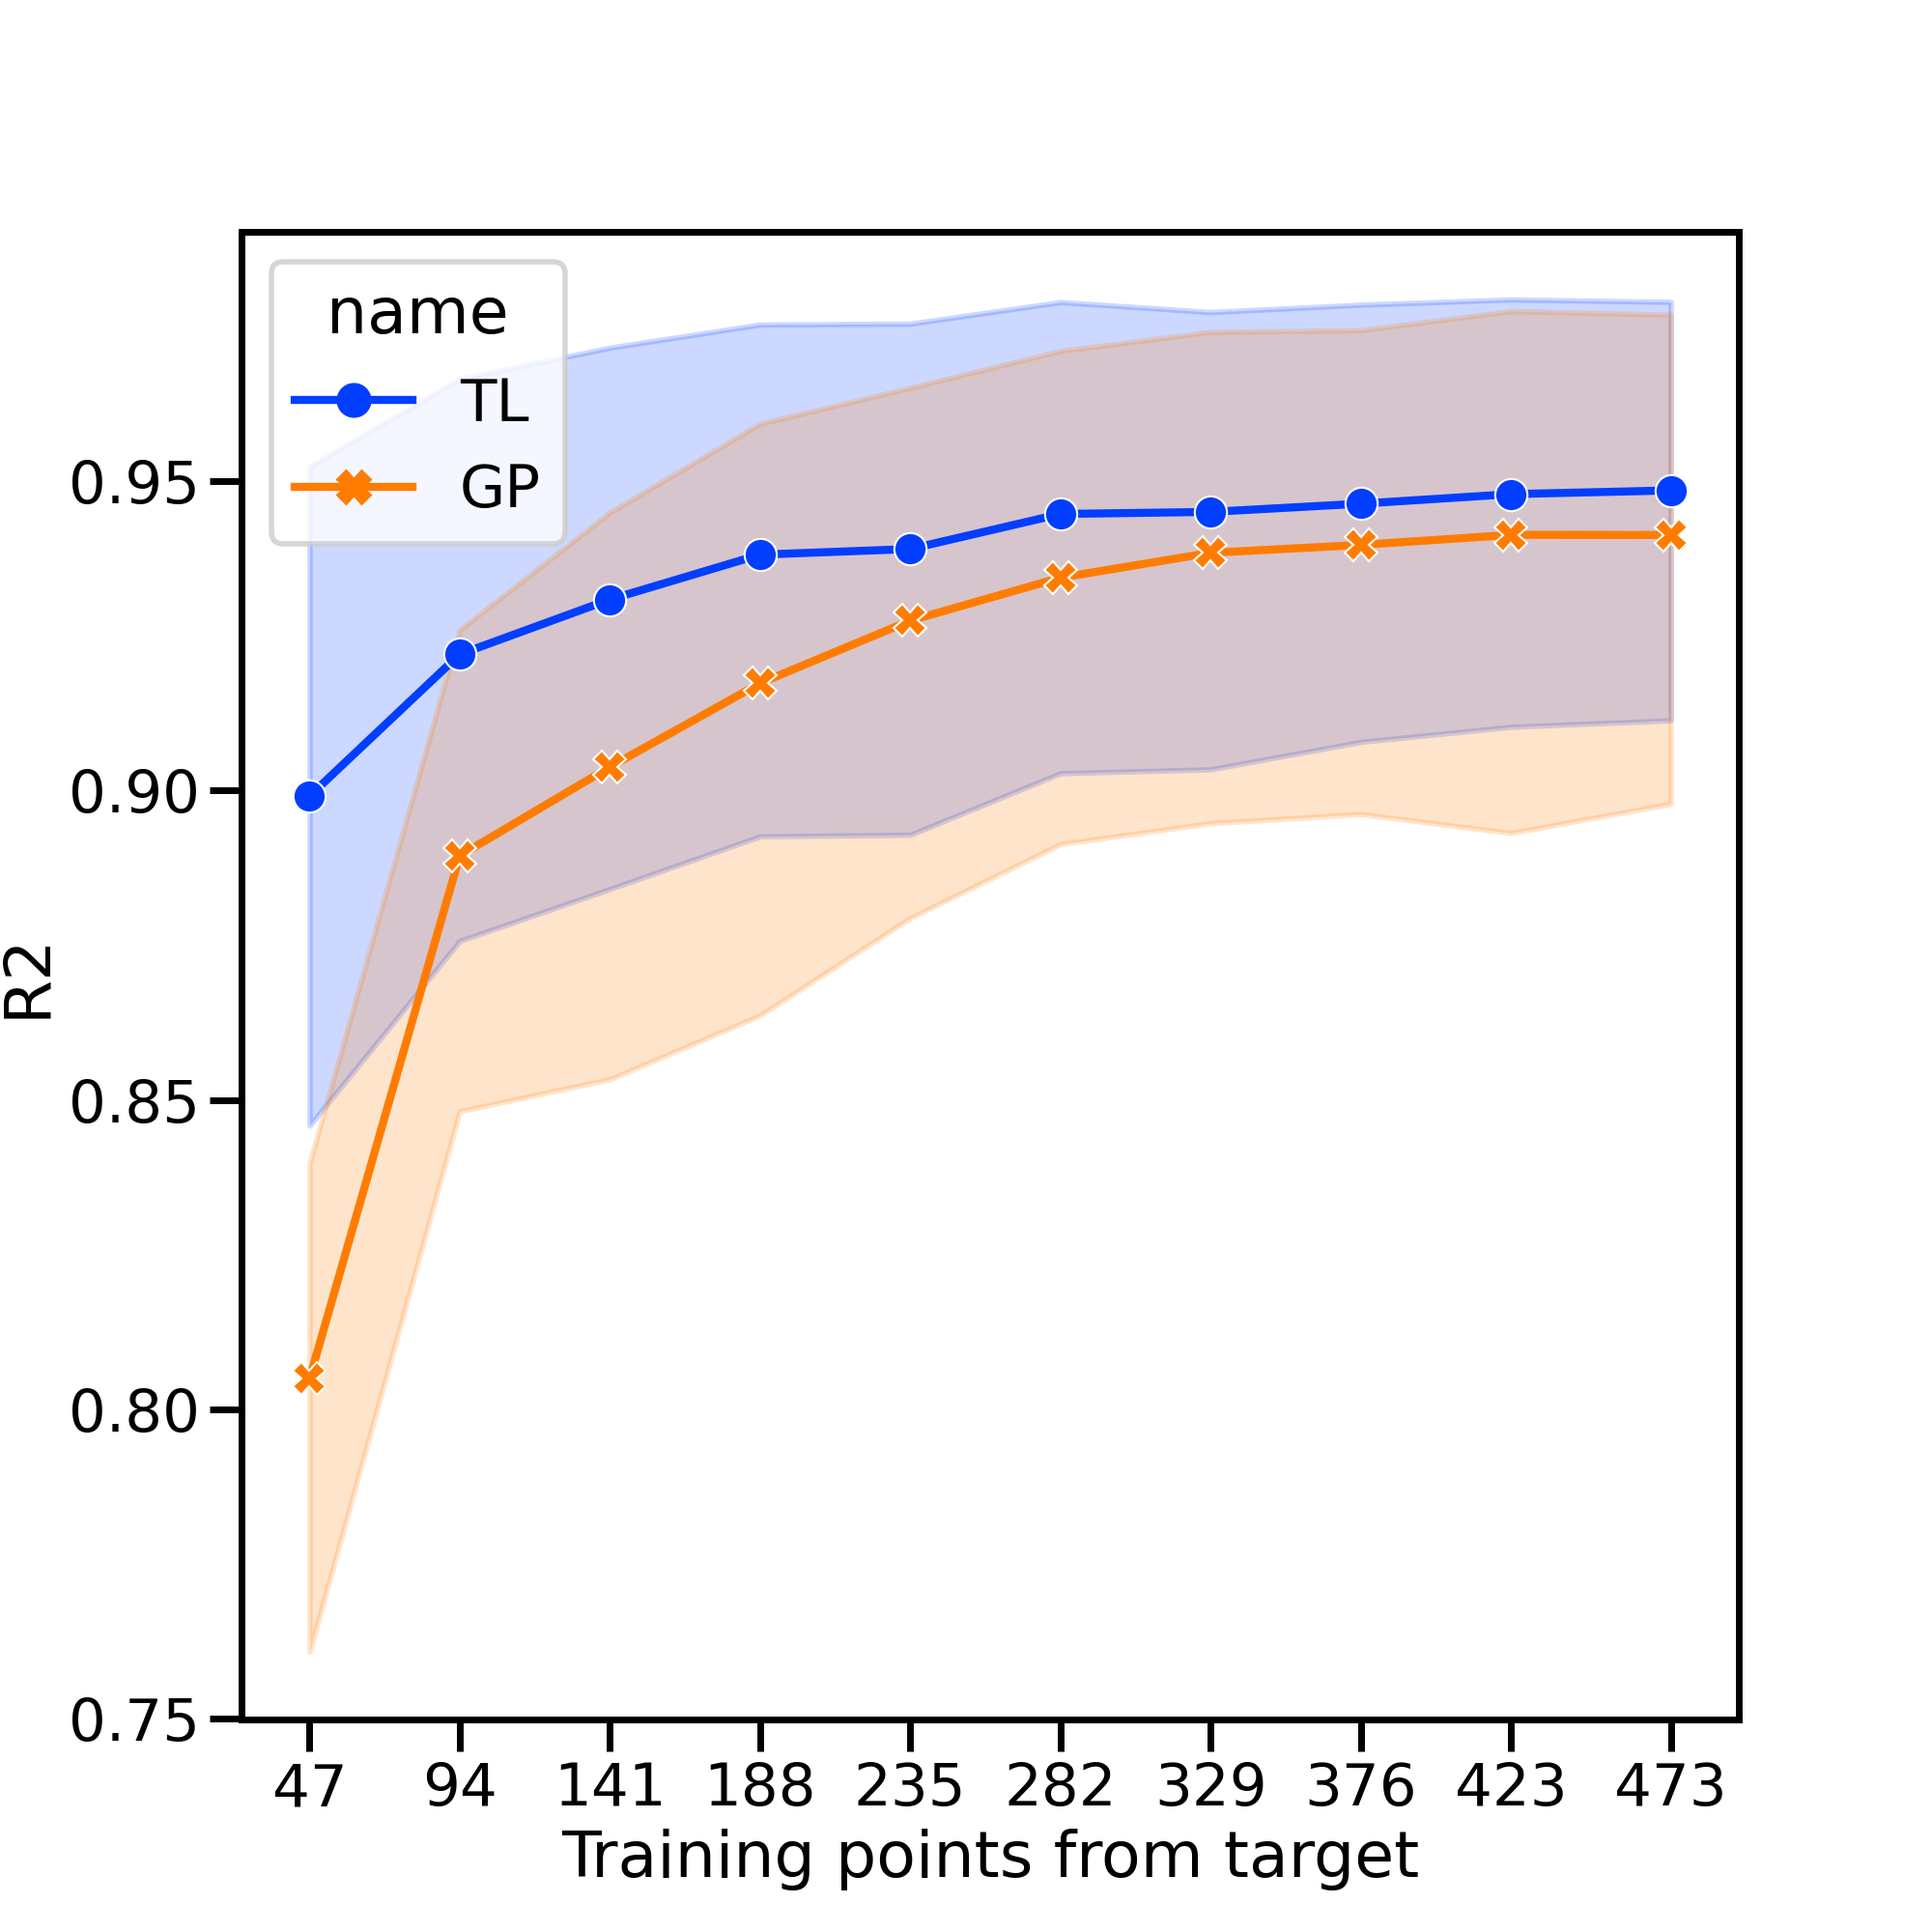

In [17]:
sns.set_context('poster')
line,ax = plt.subplots(figsize=(10,10))
ax = sns.lineplot(data=df_all.drop('MSE', axis=1), x="n_training", y="R2",palette='bright',
                hue='name', style="name",
               markers=True, dashes=False)
#ax.set_title('Averaged R2')
ax.set(xticks=np.unique(df_all['n_training']), xlabel='Training points from target')
plt.savefig("AuAuGrad_averaged_R2.png", dpi=100)


In [18]:
savings = 'AuAu':[144,336],''}

SyntaxError: invalid syntax (<ipython-input-18-3a8a6994e2d1>, line 1)